### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 3

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Ким Реачна
##### Группа: НПИбд-01-20

## Москва 2023
***

### Вариант № 15

Для закрепленного за Вами варианта лабораторной работы:

1. Считайте из заданного набора данных репозитария UCI значения двух признаков и метки класса. 


In [1]:
from sklearn.metrics.cluster import contingency_matrix
from urllib.request import urlopen
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from contextlib import closing
import pandas as pd
import numpy as np
import warnings


warnings.filterwarnings("ignore")

In [2]:
f1, f2 = 0,6
target = 3

In [3]:
df = pd.read_csv("../data/auto-mpg.data",
                 delimiter=" ", header=None, usecols=(f1,f2,target))
df.head()

,0,3,6
0,18.0,8.0,307.0
1,15.0,8.0,350.0
2,18.0,8.0,318.0
3,16.0,8.0,304.0
4,17.0,8.0,302.0


2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на медианные значения того класса, к которому относится запись с пропущенным значением в признаке.


In [4]:
df = df.replace('?', np.NaN)
print('Число записей = %d' % (df.shape[0]))
print('Число признаков = %d' % (df.shape[1]))
print('Число пропущенных значений:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Число записей = 398
Число признаков = 3
Число пропущенных значений:
	0: 0
	3: 1
	6: 1


In [5]:
df.dropna(subset=[target], inplace=True)
df[[f1, f2]] = df[[f1, f2]].fillna(df.median)
print('Число пропущенных значений:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Число пропущенных значений:
	0: 0
	3: 0
	6: 0


3. Если количество различных меток класса больше пяти, то объедините некоторые (наименее многочисленные) классы, чтобы общее количество классов не превышало семь. 

In [6]:
df[target].value_counts()

4.0    204
8.0    102
6.0     84
3.0      4
5.0      3
Name: 3, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df[target] = lb_make.fit_transform(df[target])
df[target].value_counts()

1    204
4    102
3     84
0      4
2      3
Name: 3, dtype: int64

In [8]:
lens = df[target].value_counts().shape[0]

4. Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

In [9]:
X = df[[f1,f2]].astype(float)
y = df[target].astype(int)

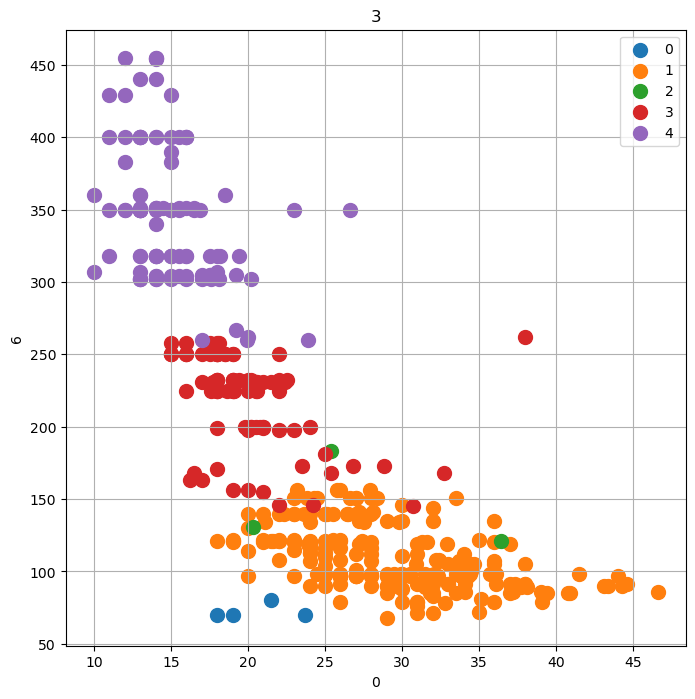

In [10]:
def plot_cluster(X,y):
    plt.figure(figsize=(8,8))
    clusters = np.unique(y)
    for cluster in clusters:
        row_ix = np.where(y == cluster)
        plt.scatter(X[row_ix, 0], X[row_ix, 1],s=100, label = cluster)
    plt.title(target)
    plt.xlabel(f1) 
    plt.ylabel(f2)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_cluster(X.values,y)

5. Проведите кластеризацию набора данных из двух признаков с помощью алгоритмов, указанных в индивидуальном задании, для случая, когда количество кластеров равно количеству классов в исходном наборе (с учетом корректировки). В случае отсутствия сходимости алгоритма измените аргументы по умолчанию или используйте для кластеризации случайную выборку из набора данных.

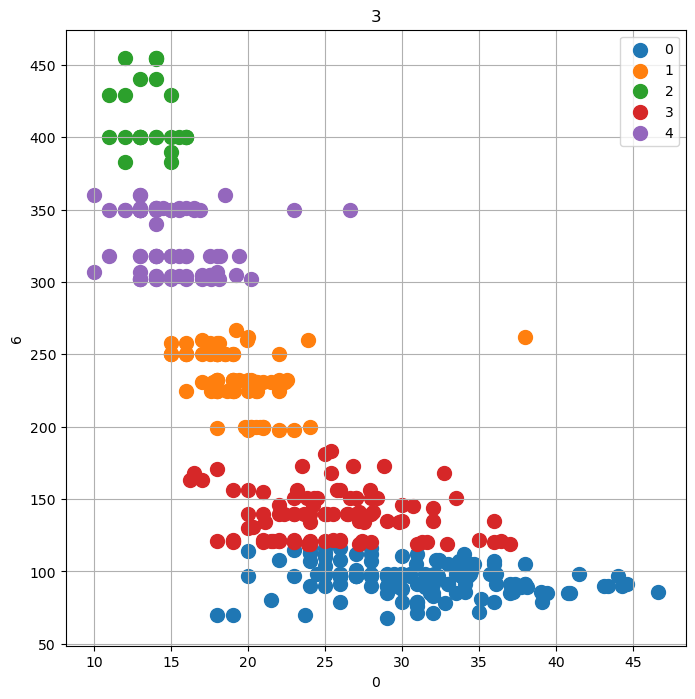

In [11]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=lens)
model.fit(X)
yhat1 = model.predict(X)
plot_cluster(X.values,yhat1)

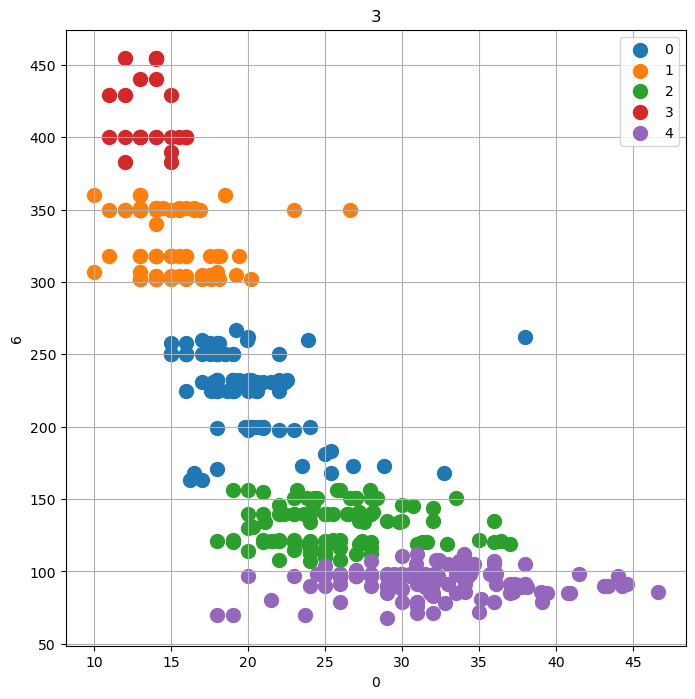

In [12]:
from sklearn.cluster import Birch
model = Birch(threshold=0.01, n_clusters=lens)
model.fit(X)
yhat2 = model.predict(X)
plot_cluster(X.values,yhat2)

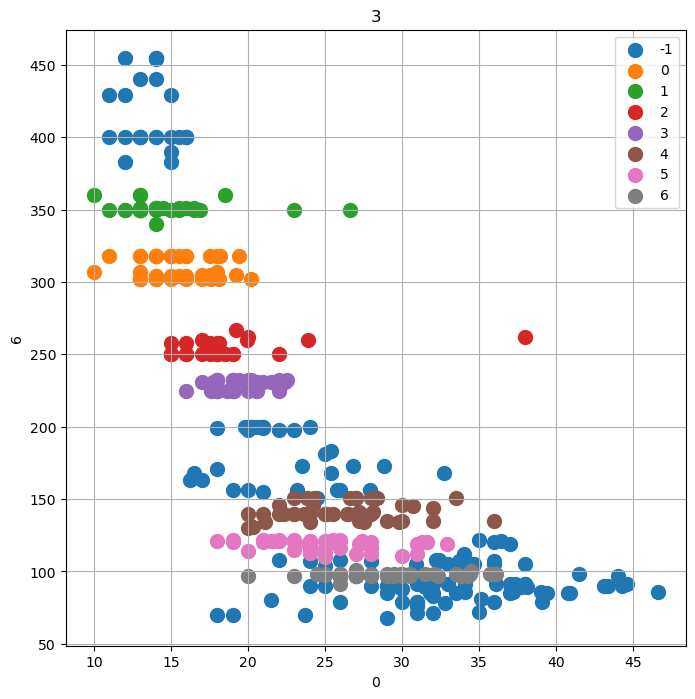

In [13]:
from sklearn.cluster import OPTICS
model = OPTICS(eps=1, min_samples=25)
yhat3 = model.fit_predict(X)
plot_cluster(X.values,yhat3)

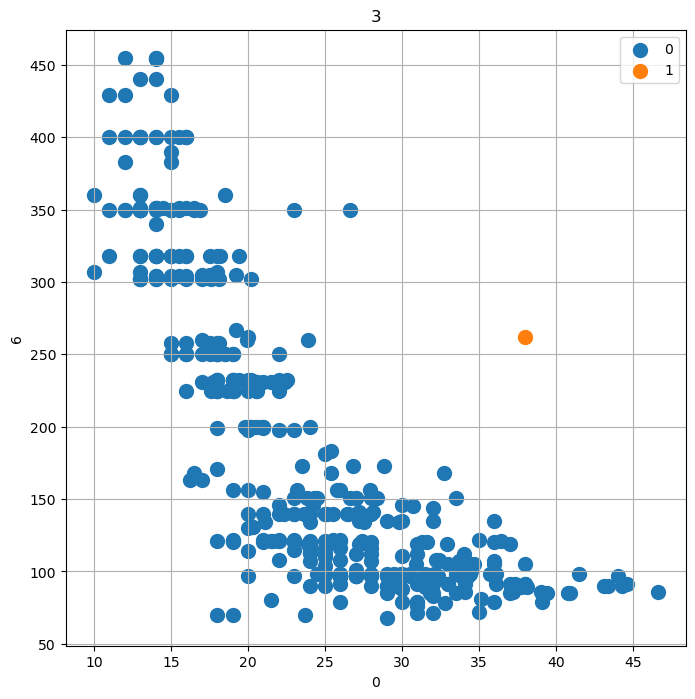

In [14]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=lens)
yhat4 = model.fit_predict(X)
plot_cluster(X.values,yhat4)

6. Для каждого из алгоритмов кластеризации, указанных в индивидуальном задании, постройте матрицу сопряженности, используя функцию `contingency_matrix()` из scikit-learn, и найдите значения мер качества кластеризации, указанные в индивидуальном задании.  


In [15]:
print ('\n', contingency_matrix(y, yhat1))
print ('\n', contingency_matrix(y, yhat2))
print ('\n', contingency_matrix(y, yhat3))
print ('\n', contingency_matrix(y, yhat4))


 [[  4   0   0   0   0]
 [128   0   0  76   0]
 [  0   0   0   3   0]
 [  0  68   0  16   0]
 [  0   5  25   0  72]]

 [[  0   0   0   0   4]
 [  0   0  91   0 113]
 [  1   0   2   0   0]
 [ 78   0   6   0   0]
 [  5  72   0  25   0]]

 [[ 4  0  0  0  0  0  0  0]
 [80  0  0  0  0 39 43 42]
 [ 2  0  0  0  0  1  0  0]
 [26  0  0 23 32  3  0  0]
 [25 41 31  5  0  0  0  0]]

 [[  4   0]
 [204   0]
 [  3   0]
 [ 83   1]
 [102   0]]


In [16]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
            TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
            FP += 1
        if y_actual[i]==y_pred[i]==0:
            TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
            FN += 1
    return(TP, FP, TN, FN)
print (perf_measure(y.values, yhat1))
print (perf_measure(y.values, yhat2))
print (perf_measure(y.values, yhat3))
print (perf_measure(y.values, yhat4))

(0, 73, 4, 128)
(0, 72, 0, 84)
(0, 31, 0, 41)
(0, 1, 4, 392)


In [17]:
from sklearn.metrics.cluster import rand_score
print (rand_score(y, yhat1))
print (rand_score(y, yhat2))
print (rand_score(y, yhat3))
print (rand_score(y, yhat4))

0.8035137266875302
0.8129532096786505
0.6589827748517925
0.3763325954761723


In [18]:
import numpy as np
from scipy.stats import entropy

def conditional_entropy(clustering, ground_truth):
  
    unique_clusters = np.unique(clustering)
    unique_labels = np.unique(ground_truth)
    n_clusters = len(unique_clusters)
    n_labels = len(unique_labels)
    
    cond_entropy = 0.0
    
    for cluster in unique_clusters:
        cluster_indices = np.where(clustering == cluster)[0]
        cluster_labels = ground_truth[cluster_indices]
        
        for label in unique_labels:
            label_count = np.sum(cluster_labels == label)
            cluster_count = len(cluster_labels)
            
            if label_count > 0:
                p_cluster_given_label = label_count / cluster_count
                p_label = np.sum(ground_truth == label) / len(ground_truth)
                cond_entropy -= p_cluster_given_label * np.log2(p_cluster_given_label / p_label)
    
    return cond_entropy

print (conditional_entropy(y, yhat1))
print (conditional_entropy(y, yhat2))
print (conditional_entropy(y, yhat3))
print (conditional_entropy(y, yhat4))

-7.903805699657514
-7.419086033910511
-5.859064694297161
-0.027752003274580515


7. Определите алгоритм кластеризации, оптимальный с точки зрения меры качества кластеризации, указанной в индивидуальном задании.

In [19]:
import numpy as np
from scipy.stats import entropy

def conditional_entropy(clustering, ground_truth):
  
    unique_clusters = np.unique(clustering)
    unique_labels = np.unique(ground_truth)
    n_clusters = len(unique_clusters)
    n_labels = len(unique_labels)
    
    cond_entropy = 0.0
    
    for cluster in unique_clusters:
        cluster_indices = np.where(clustering == cluster)[0]
        cluster_labels = ground_truth[cluster_indices]
        
        for label in unique_labels:
            label_count = np.sum(cluster_labels == label)
            cluster_count = len(cluster_labels)
            
            if label_count > 0:
                p_cluster_given_label = label_count / cluster_count
                p_label = np.sum(ground_truth == label) / len(ground_truth)
                cond_entropy -= p_cluster_given_label * np.log2(p_cluster_given_label / p_label)
    
    return cond_entropy

print (conditional_entropy(y, yhat1))
print (conditional_entropy(y, yhat2))
print (conditional_entropy(y, yhat3))
print (conditional_entropy(y, yhat4))

-7.903805699657514
-7.419086033910511
-5.859064694297161
-0.027752003274580515


In [20]:
best = 'K-means'

In [21]:
print ("Алгоритм кластеризации, оптимальный с точки зрения меры качества кластеризации, указанной в индивидуальном задании - ", best)

Алгоритм кластеризации, оптимальный с точки зрения меры качества кластеризации, указанной в индивидуальном задании -  K-means


8. Для оптимального алгоритма кластеризации из предыдущего пункта визуализируйте области принятия решения и набор данных в виде точек на плоскости с координатами, соответствующими двум признакам, отображая точки различных кластеров разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

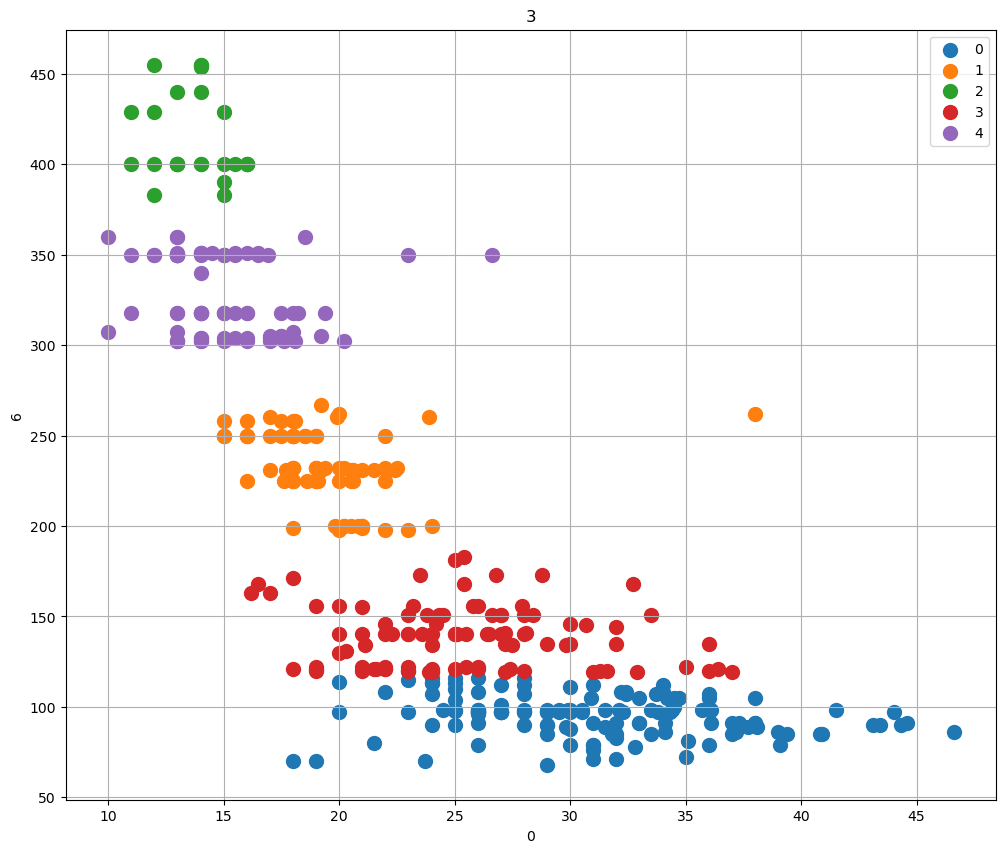

In [22]:
def plot_cluster(X,y):
    plt.figure(figsize=(12,10))
    clusters = np.unique(y)
    for cluster in clusters:
        row_ix = np.where(y == cluster)
        plt.scatter(X[row_ix, 0], X[row_ix, 1],s=100, label = cluster)
    plt.title(target)
    plt.xlabel(f1) 
    plt.ylabel(f2)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_cluster(X.values,yhat1)